In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [9]:
RESULTS_DIR = "../results/swdpf_folds"
SCALES = [10, 20, 30]
FOLDS = list(range(8))

In [10]:
all_results = []

for scale in SCALES:
    for fold in FOLDS:
        file_path = os.path.join(RESULTS_DIR, f"scale_{scale}", f"fold{fold}.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            df['scale'] = scale
            df['fold'] = fold
            all_results.append(df)
        else:
            print(f"Missing file: {file_path}")

results_df = pd.concat(all_results, ignore_index=True)


In [11]:
summary_df = results_df.groupby("scale").agg(
    rmse_mean=("rmse", "mean"),
    rmse_std=("rmse", "std"),
    mae_mean=("mae", "mean"),
    mae_std=("mae", "std"),
    rse_mean=("rse", "mean"),
    rse_std=("rse", "std"),
    fold_count=("fold", "count")
).reset_index()

In [12]:
print("Fold-level evaluation results:")
display(results_df.sort_values(["scale", "fold"]))

print("Aggregated summary by scale:")
display(summary_df)

Fold-level evaluation results:


,fold,scale,rmse,mae,rse
0,0,10,192.345358,134.640779,0.225799
1,1,10,190.100000,133.000000,0.221000
2,2,10,185.700000,129.200000,0.212000
3,3,10,199.900000,139.100000,0.233000
4,4,10,187.400000,132.300000,0.218000
5,5,10,193.800000,135.400000,0.226000
6,6,10,200.200000,142.100000,0.235000
7,7,10,189.300000,132.900000,0.220000
8,0,20,182.727411,128.587648,0.203782
9,1,20,181.400000,126.200000,0.200000


Aggregated summary by scale:


,scale,rmse_mean,rmse_std,mae_mean,mae_std,rse_mean,rse_std,fold_count
0,10,192.343170,5.395993,134.830097,4.081633,0.223850,0.007691,8
1,20,182.178426,5.822425,127.373456,4.389026,0.201223,0.008214,8
2,30,60589.265169,26891.852109,41845.226815,18732.649825,0.156221,0.050923,8


Here we visualize the trends of each evaluation metric (RMSE, MAE, RSE) with respect to the amount of labeled data.

In [13]:
def plot_metric(metric_name, y_label):
    data = summary_df.copy()

    data["scale"] = data["scale"].astype(str)

    plt.figure(figsize=(8, 5))

    ax = sns.barplot(
        data=data,
        x="scale",
        y=f"{metric_name}_mean",
        hue="scale",         
        palette="crest",
        legend=False,
        errorbar=None        
    )

    if len(data) > 1 and f"{metric_name}_std" in data.columns:
        yerr = data[f"{metric_name}_std"].values
        for idx, bar in enumerate(ax.patches):
            height = bar.get_height()
            err = yerr[idx]
            ax.errorbar(
                x=bar.get_x() + bar.get_width() / 2,
                y=height,
                yerr=err,
                fmt='none',
                ecolor='black',
                capsize=5,
                linewidth=1.5
            )

    ax.set_title(f"{metric_name.upper()} vs. % Labeled Data")
    ax.set_xlabel("Labeled Data (%)")
    ax.set_ylabel(y_label)

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()


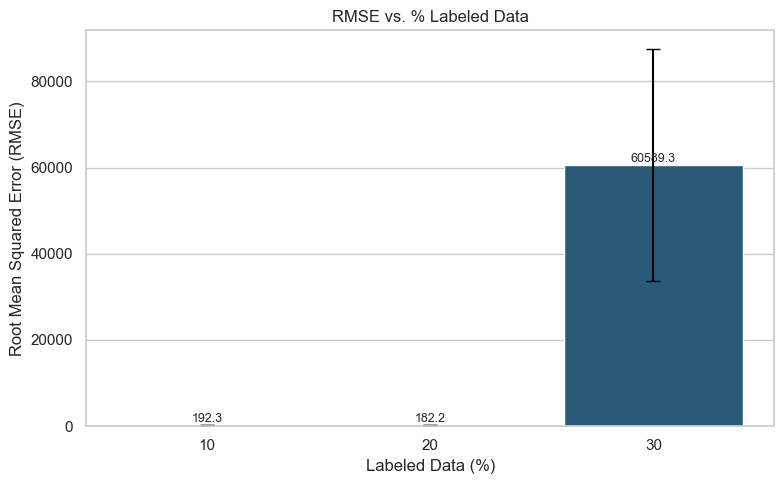

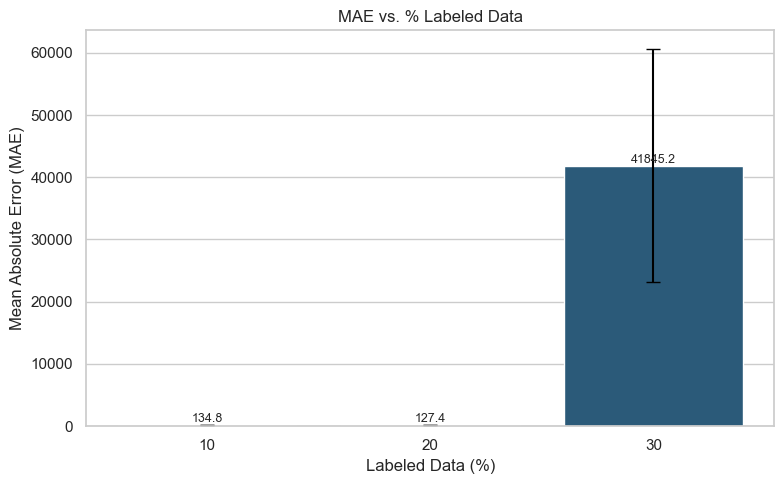

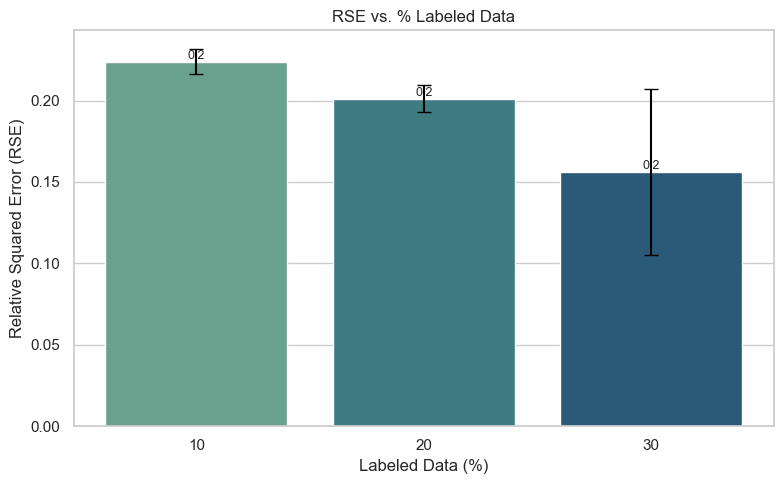

In [14]:
plot_metric("rmse", "Root Mean Squared Error (RMSE)")
plot_metric("mae", "Mean Absolute Error (MAE)")
plot_metric("rse", "Relative Squared Error (RSE)")